# 1. Data Preparation
The Mocap data provided by [CongreG8 dataset](https://zenodo.org/records/4537811) must be processed firstly. If you have **custom data**, you need to process it similarly to step 1.1. Then you can continue with your data from step 1.2.

In [1]:
import csv
import os
import matplotlib.pyplot as plt

def read_csv_file(file_path):
    if not os.path.exists(file_path):
        print(f'File {file_path} does not exist')
        return None
    with open(file_path) as f:
        reader = csv.reader(f)
        data = list(reader)
    return data

### 1.1 Calculating relative positions of other individuals to the subject.

We plot all the relative points of the dataset to figure out the proxemic zone of a person

In [3]:
import numpy as np

def extract_data(data, radius=1.0, scale=1.0):
    # this function extracts x and z datapoints from the csv file.
    # radius enables to only get data points within a certain radius of the center
    # scale enables to only get a certain percentage of the data, or only the endpoints
    all_data = []
    step_size = 30
    # data structure
    # a_pos_x, a_pos_y, a_pos_z, a_rot_x, a_rot_y, a_rot_z, b_pos_x, ...
    if scale == -1:
        # in this case ony uses the endpoints
        for i in range(len(data)-3, len(data), step_size):
            a_pos_x = float(data[i][0])
            a_pos_z = float(data[i][2])
            if a_pos_x**2 + a_pos_z**2 <= radius**2:
                all_data.append([a_pos_x, a_pos_z])

            b_pos_x = float(data[i][6])
            b_pos_z = float(data[i][8])
            if b_pos_x**2 + b_pos_z**2 <= radius**2:
                all_data.append([b_pos_x, b_pos_z])

            c_pos_x = float(data[i][12])
            c_pos_z = float(data[i][14])
            if c_pos_x**2 + c_pos_z**2 <= radius**2:
                all_data.append([c_pos_x, c_pos_z])
    else:
        for i in range(0, int(len(data)*scale), step_size):
            a_pos_x = float(data[i][0])
            a_pos_z = float(data[i][2])
            if a_pos_x**2 + a_pos_z**2 <= radius**2:
                all_data.append([a_pos_x, a_pos_z])

            b_pos_x = float(data[i][6])
            b_pos_z = float(data[i][8])
            if b_pos_x**2 + b_pos_z**2 <= radius**2:
                all_data.append([b_pos_x, b_pos_z])

            c_pos_x = float(data[i][12])
            c_pos_z = float(data[i][14])
            if c_pos_x**2 + c_pos_z**2 <= radius**2:
                all_data.append([c_pos_x, c_pos_z])
    return all_data


def get_all_points_within_radius(radius, scale=1.0):
    # this function goes through all the data and extracts the data points
    in_path = '../data_utils/all_rel_chest_data/human_group/'
    all_data = []
    # go through all groups
    for group_nr in range(1,11):
        for csv_nr in range(1, 42):
            # read the csv file
            file_path_a = in_path + f'Group{group_nr}/{csv_nr}_1.csv'
            data = read_csv_file(file_path_a)
            if data is None:
                continue
            # get the relative data from the other persons
            all_data += extract_data(data, radius, scale)    

            file_path_b = in_path + f'Group{group_nr}/{csv_nr}_2.csv'
            data = read_csv_file(file_path_b)
            if data is None:
                continue
            all_data += extract_data(data, radius, scale)    

            file_path_c = in_path + f'Group{group_nr}/{csv_nr}_3.csv'
            data = read_csv_file(file_path_c)
            if data is None:
                continue
            all_data += extract_data(data, radius, scale)    

            file_path_d = in_path + f'Group{group_nr}/{csv_nr}_4.csv'
            data = read_csv_file(file_path_d)
            if data is None:
                continue
            all_data += extract_data(data, radius, scale)    

            
    return all_data


def get_adjudicator_points_in_radius_for_center_of_group(path, number, index_start, radius=1.0, scale=1.0, center_distance=0):
    if index_start == -1:
        return None
    return_data = []
    data = read_csv_file(path)
    if data is None:
        return

    # go through all the data points
    # in steps bc its too much data to plot
    for i in range(0, round(len(data)*scale), 30):
        # the data structure is always sorted the same way
        # example: p4 is adjudicator => data is: p1, p2, p3
        # example: p2 is adjudicator => data is: p1, p3, p4 etc.       
        buffer = index_start*6
        adjudicator_pos_x = float(data[i][0+buffer])
        adjudicator_pos_z = float(data[i][2+buffer])-center_distance
        # checks if abs. value of position is smaller or equal to radius
        if np.sqrt(adjudicator_pos_x**2 + adjudicator_pos_z**2) <= radius:
            return_data.append([adjudicator_pos_x, adjudicator_pos_z])

    return return_data

def get_all_points_in_radius(radius=1.0, scale=1.0, center_distance=0):
    # this function goes through all the data and extracts the data points
    # radius is the radius around the center of the group
    # scale is the percentage of the data that should be used
    # center_distance is the distance of the center of the group to the coordinate center
    in_path = '../data_utils/all_rel_chest_data/human_group/'

    subject_A = -1
    subject_B = -1
    subject_C = -1
    all_data = []
    for group in range(1, 11):
        for csv_number in range(1, 43):
            if csv_number >= 1 and csv_number <= 10:
                # p4 is adjudicator
                subject_A = 1
                index_start_A = 2
                subject_B = 2
                index_start_B = 2
                subject_C = 3
                index_start_C = 2
            elif csv_number >= 11 and csv_number <= 20:
                # p3 is adjudicator
                subject_A = 1
                index_start_A = 1
                subject_B = 2
                index_start_B = 1
                subject_C = 4
                index_start_C = 2
            elif csv_number >= 21 and csv_number <= 30:
                # p2 is adjudicator
                subject_A = 1
                index_start_A = 0
                subject_B = 3
                index_start_B = 1
                subject_C = 4
                index_start_C = 1
            elif csv_number >= 31 and csv_number <= 42:
                # p1 is adjudicator
                subject_A = 2
                index_start_A = 0
                subject_B = 3
                index_start_B = 0
                subject_C = 4
                index_start_C = 0

            
            subject_A_path = in_path + f'Group{group}/{csv_number}_{subject_A}.csv'
            subject_A_data = get_adjudicator_points_in_radius_for_center_of_group(subject_A_path, 
                            csv_number, index_start_A, radius, scale=scale, center_distance=center_distance)
            if subject_A_data is not None:
                all_data = all_data + subject_A_data
            
            subject_B_path = in_path + f'Group{group}/{csv_number}_{subject_B}.csv'
            subject_B_data = get_adjudicator_points_in_radius_for_center_of_group(subject_B_path,
                            csv_number, index_start_B, radius, scale=scale, center_distance=center_distance)
            if subject_B_data is not None:
                all_data = all_data + subject_B_data

            subject_C_path = in_path + f'Group{group}/{csv_number}_{subject_C}.csv'
            subject_C_data = get_adjudicator_points_in_radius_for_center_of_group(subject_C_path,
                            csv_number, index_start_C, radius, scale=scale, center_distance=center_distance)
            if subject_C_data is not None:
                all_data = all_data + subject_C_data


    return all_data

            

Data points within the defined radius are being used.

In [4]:
radius = 1.0
# distance from the center of the group to the subject 
center_distance = 0
# makes (0,0) the center of the group, not the position of the subject
# the group has an average size on 0.82 meters
# => set the center of group to 0.41 meters in front the person
# => 0.41 in z direction
# center_distance = 0.41

# get all endpoint points in radius
all_endpoints = get_all_points_within_radius(radius, scale=-1)
# only get 50% of the endpoints
all_endpoints = all_endpoints[0:int(len(all_endpoints)*1.0)]


# get all adjudicator points in radius
all_data_adjudicator = get_all_points_in_radius(radius, scale=0.7, center_distance=center_distance)

# combine the data
all_data = all_endpoints + all_data_adjudicator


File ../data_utils/all_rel_chest_data/human_group/Group1/4_1.csv does not exist
File ../data_utils/all_rel_chest_data/human_group/Group1/6_1.csv does not exist
File ../data_utils/all_rel_chest_data/human_group/Group1/17_1.csv does not exist
File ../data_utils/all_rel_chest_data/human_group/Group1/18_1.csv does not exist
File ../data_utils/all_rel_chest_data/human_group/Group1/20_1.csv does not exist
File ../data_utils/all_rel_chest_data/human_group/Group1/22_1.csv does not exist
File ../data_utils/all_rel_chest_data/human_group/Group1/29_1.csv does not exist
File ../data_utils/all_rel_chest_data/human_group/Group1/34_1.csv does not exist
File ../data_utils/all_rel_chest_data/human_group/Group1/41_1.csv does not exist
File ../data_utils/all_rel_chest_data/human_group/Group5/11_1.csv does not exist
File ../data_utils/all_rel_chest_data/human_group/Group10/10_1.csv does not exist
File ../data_utils/all_rel_chest_data/human_group/Group10/15_1.csv does not exist
File ../data_utils/all_rel_c

Plottings

(8352, 2)


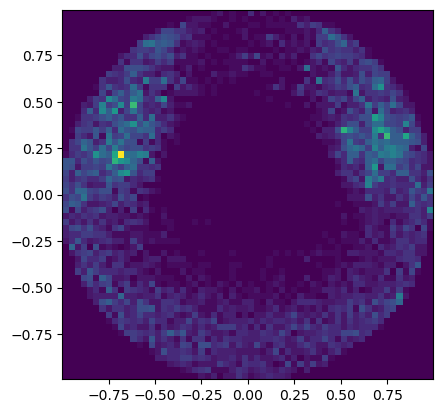

In [5]:
# Convert the list of lists to a NumPy array
all_data = np.array(all_data)  # Now all_data.shape should be (8352, 2)

# Check shape (optional debug)
print(all_data.shape)  # Should print (8352, 2)
# make a histogram
num_bins = 60
histogram, xedges, yedges, img = plt.hist2d(all_data[:,0], all_data[:,1], bins=num_bins)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

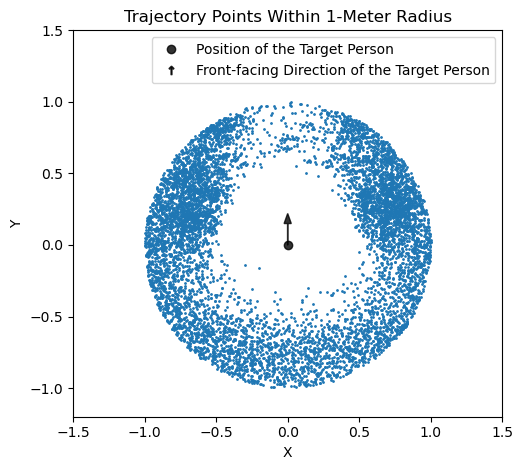

In [6]:
from matplotlib.lines import Line2D

# plot the data
all_data = np.array(all_data)
plt.scatter(all_data[:,0], all_data[:,1], s=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Trajectory Points Within 1-Meter Radius')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.2, 1.5)


plt.arrow(x=0, y=0, dx=0, dy=0.15, width=0.002, head_width=0.05, head_length=0.07, color='k', alpha=0.8)
# Plot the dot at the origin
plt.plot(0, 0, 'ko', alpha=0.8)  
# Create proxy artists for the legend
arrow_proxy = Line2D([0], [0], color='k', marker=r'$\uparrow$', linestyle='None', alpha=0.8)
dot_proxy = Line2D([0], [0], color='k', marker='o', linestyle='None', alpha=0.8)

# Add legend with both entries
plt.legend([dot_proxy, arrow_proxy], ['Position of the Target Person', 'Front-facing Direction of the Target Person'])

plt.xlabel('X')
plt.ylabel('Y')
    # plt.axis('equal')
plt.tight_layout()
    # Save to PNG
plt.savefig("traj.png", dpi=300)
plt.show()

### 1.2 Create a histogramm based on the data.

max density: 34.0
min density: 0.0


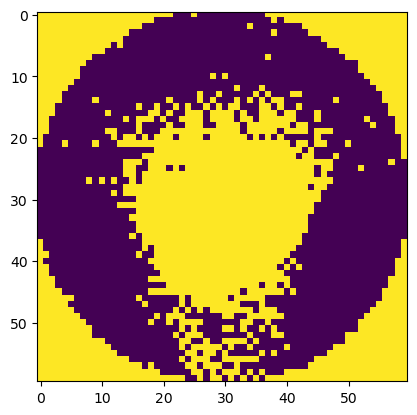

In [7]:
# max value of diesity
max_density = np.max(histogram)
print(f'max density: {max_density}')

# min value of density
min_density = np.min(histogram)
print(f'min density: {min_density}')

# inverse histogram
histogram_inversed = np.zeros((num_bins, num_bins))
for i in range(num_bins):
    for j in range(num_bins):
        # normalizes inverse density
        temp_density = float((max_density - histogram[i][j]) / max_density) 
        # logisitc function to increase contrast
        # scale = 20
        # steepness = 100
        # offset = 1.0
        # temp_density = scale / (1 + np.exp(-steepness * (temp_density - offset)))
        histogram_inversed[i][j] = int(temp_density)
        

inverse_max_density = np.max(histogram_inversed)
inverse_min_density = np.min(histogram_inversed)

# transpose histogram_inversed
histogram_inversed = np.transpose(histogram_inversed)

# plots histogram_inversed
fig_hist_inv, ax_hist_inv = plt.subplots()
ax_hist_inv.imshow(histogram_inversed)
plt.show()

### 1.3 Generate sample points from the inversed histogram

Bin length: 0.03333333333333333m


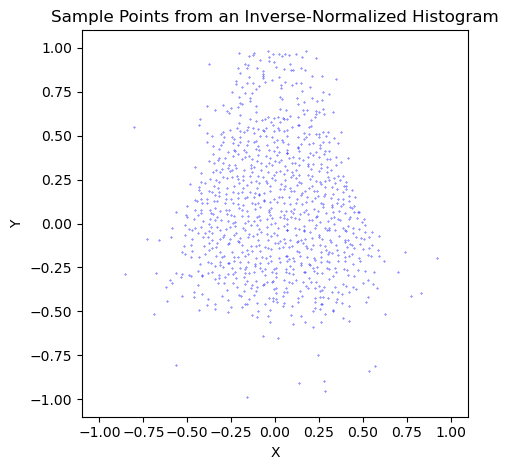

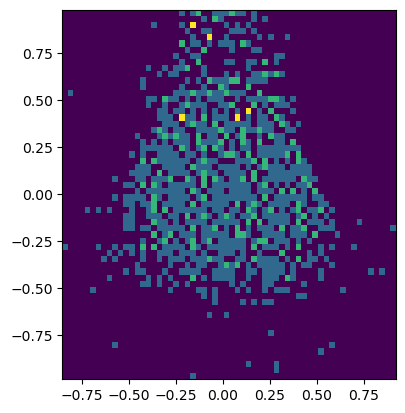

In [8]:
# bin_length = (radius*2) / num_bins
bin_length = 2 * radius / num_bins
print(f'Bin length: {bin_length}m')

data_from_hist = []
for i in range(num_bins):
    for j in range(num_bins):
        # create uniform points from density
        # define area in which the points are created
        x_min = -radius + j * bin_length
        x_max = -radius + (j+1) * bin_length
        y_min = -radius + i * bin_length
        y_max = -radius + (i+1) * bin_length

        # get density value
        density = int(histogram_inversed[i][j] )
       
        for k in range(density):
            x = np.random.uniform(x_min, x_max)
            y = np.random.uniform(y_min, y_max)
            if np.sqrt(x**2 + (y)**2) <= radius:
                data_from_hist.append([x, y])
                

# plot data_from_hist
fig_data_from_hist, ax_data_from_hist = plt.subplots()
for xy in data_from_hist:
    ax_data_from_hist.plot(xy[0], xy[1], 'x', color='blue', alpha=0.4, markersize=1)

plt.title('Sample Points from an Inverse-Normalized Histogram')
plt.xlabel('X')
plt.ylabel('Y')
    # plt.axis('equal')

# set x and y limits
plt.xlim(-radius-0.1, radius+0.1)
plt.ylim(-radius-0.1, radius+0.1)
# make plot square and not rectangular
plt.gca().set_aspect('equal', adjustable='box')
#plt.title(f'All adjudicator + endpoints points in radius {radius} from histogram')

plt.tight_layout()
    # Save to PNG
plt.savefig("samples.png", dpi=300)

plt.show()

# plot data_from_hist as a 2d histogram
fig_data_from_hist_hist, ax_data_from_hist_hist = plt.subplots()
x = [xy[0] for xy in data_from_hist]
y = [xy[1] for xy in data_from_hist]
data_histogram, xedges, yedges, img =  ax_data_from_hist_hist.hist2d(x, y, bins=num_bins)
plt.gca().set_aspect('equal', adjustable='box')

plt.show()


# 2. Fitting the processed data on a bivariate SN.

mu: [ 0.01431807 -0.30797238]
shape: [[ 0.07838676 -0.00946168]
 [-0.00946168  0.30178896]]
lmbda: [0.02099886 2.10735874]


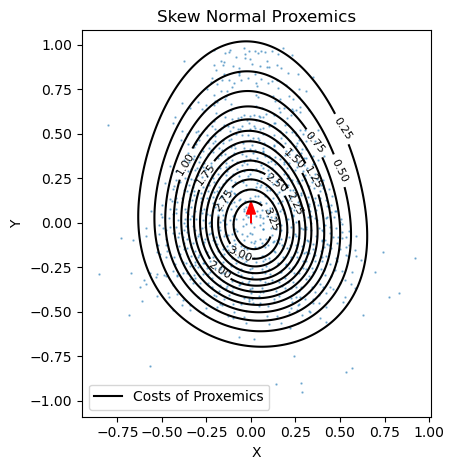

In [9]:
from mvem.stats import multivariate_skewnorm as mvsn
from mvem.mixture import skewnorm as sn
import matplotlib.pyplot as plt
import scipy
import numpy as np
from matplotlib.lines import Line2D


plot_alpha = 0.5

def get_contours(x, model, params):
    # pdf positions
    xmin = np.min(x, axis=0)
    xmax = np.max(x, axis=0)
    # fit for a bigger space
    scale = 0.1
    xxmin = xmin[0] - np.abs(scale*xmin[0])
    xxmax = xmax[0] + scale*xmax[0]
    yymin = xmin[1] - np.abs(scale*xmin[1])
    yymax = xmax[1] + scale*xmax[1]
    X    = np.linspace(xxmin, xxmax, 400)
    Y    = np.linspace(yymin, yymax, 400)
    X, Y = np.meshgrid(X, Y)
    pos  = np.dstack((X, Y))

    # fitted pdf at specified positions
    Z = model.pdf(pos, *params)
    Z = Z / Z.sum()

    # find quantiles
    q = [0.99, 0.95, 0.90, 0.85, 0.80]
    t = np.linspace(0, Z.max(), 1000)
    integral = ((Z >= t[:, None, None]) * Z).sum(axis=(1,2))
    f = scipy.interpolate.interp1d(integral, t)
    t_contours_true = f(q)

    # assure list form
    if len(t_contours_true.shape) == 0:
        t_contours_true = [t_contours_true]
    return X, Y, Z, t_contours_true

# plots data_to_plot
def plot_polar_data(data, shrink_value=0.0):
    data_np = np.array(data)
    plot_single_sn(data_np)

def plot_msn(data_np, num_of_distrib=2, initial_mus=None):
    #mixture model
    result = sn.fit(data_np, num_of_distrib, error=1e-6)

    xmin = np.min(data_np, axis=0)
    xmax = np.max(data_np, axis=0)
    # fit for a bigger space
    xxmin = xmin[0] - 0.1*xmin[0]
    xxmax = xmax[0] + 0.1*xmax[0]
    yymin = xmin[1] - 0.1*xmin[1]
    yymax = xmax[1] + 0.1*xmax[1]
    X    = np.linspace(xxmin, xxmax, 400)
    Y    = np.linspace(yymin, yymax, 400) #350
    X, Y = np.meshgrid(X, Y)
    pos  = np.dstack((X, Y))
    Z = sn.pdf(pos, result["pi"], result["mu"], result["Sigma"], result["shape"])
    Z = Z / Z.sum()

    fig, ax = plt.subplots()
    ax.scatter(data_np[:, 0], data_np[:, 1], alpha=plot_alpha,s=0.5)
    path = ax.contour(X, Y, Z, colors="black", levels=15, alpha=0.8, label='Skew Normal Proxemic Costs')
    ax.clabel(path, inline=True, fontsize=8)

    # plots the mus of the distributions as red crosses
    for mu in result["mu"]:
        ax.plot(mu[0], mu[1], 'rx')
    # makes the plot square (usually rectangular)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


def plot_single_sn(data_np):
    # singel sn model
    mu_fitted, shape_fitted, lmbda_fitted, loglikelihood = mvsn.fit(data_np, return_loglike=True,eps=10, ptol=1e-1000,ftol=1e-1000,  maxiter=1000)

    # print the fitted parameters
    print(f"mu: {mu_fitted}")
    print(f"shape: {shape_fitted}")
    print(f"lmbda: {lmbda_fitted}")

    xmin = np.min(data_np, axis=0)
    xmax = np.max(data_np, axis=0)
    # creates a bigger space for the fitted sn model
    xxmin = xmin[0] - 0.1*xmin[0]
    xxmax = xmax[0] + 0.1*xmax[0]
    yymin = xmin[1] - 0.1*xmin[1]
    yymax = xmax[1] + 0.1*xmax[1]
    # plots the contours of the fitted sn model onto the same plot as the data
    X, Y = np.meshgrid(np.linspace(xxmin, xxmax, 400), np.linspace(yymin, yymax, 400))
    pos = np.dstack((X, Y))
    Z = mvsn.pdf(pos, mu_fitted, shape_fitted, lmbda_fitted)
    Z = Z / Z.sum()

    fig, ax = plt.subplots()
    ax.scatter(data_np[:, 0], data_np[:, 1], alpha=plot_alpha, s=0.5)
    path = ax.contour(X, Y, Z, colors="black", levels=15, alpha=1)
    plt.arrow(x=0, y=0, dx=0, dy=0.05, width=0.002, head_width=0.05, head_length=0.07, color='r')

    ax.clabel(path, inline=True, fontsize=8)

    # Custom legend entry for contours
    contour_handle = Line2D([0], [0], color='black', label='Costs of Proxemics')
    ax.legend(handles=[contour_handle], fontsize=10)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(f'Skew Normal Proxemics')
    plt.xlabel('X')
    plt.ylabel('Y')
    # plt.axis('equal')
    plt.tight_layout()
    # Save to PNG
    plt.savefig("sn_plot.png", dpi=300)

    # plt.show()

data_from_hist = np.array(data_from_hist)
plot_polar_data(data_from_hist, shrink_value=0.0)